This notebook illustrates the features of the dark_showers_two_flavor.py package. The main utility is the routine which generates the pythia 8 configuration cards for the models described in arXiv 2303.04167. 

In [1]:
## make plots inline - for ipython notebooks
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, colors

# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})


# Change all fonts to 'Computer Modern'
rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=10)
rc('xtick', labelsize=16)
rc('ytick.major', size=5, pad=10)
rc('ytick', labelsize=16)

# initializing the package

Make sure dark_shower_two_flavor.py is in your python path. After we import the module, we create a dark shower object, which corresponds to a model point. To do this, we must give it 
* the pi_2 mass
* the eta mass
* the confinement scale
* sin\theta
* the dark photon mass
* the dark photon gauge coupling 
* the kinetic mixin parameter between the dark photon and the SM photon. 

For example:

In [2]:
from dark_shower_two_flavor import dark_shower_two_flavor
test=dark_shower_two_flavor(
    m_pi2=2.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=1.5,
    g=0.1,
    epsilon=5e-4)

All other dependent quantities are calculated in the background. We can ask it to show the physical mass spectrum for this model point

In [3]:
test.print_spectrum()


##############################
# meson/dark photon masses
# m_pi1:    2.2  GeV
# m_pi2:    2.2  GeV
# m_pi3:    2.18  GeV
# m_eta:    5.0  GeV
# m_A:      1.5    GeV
##############################


Or show the physical mass spectrum + the underlying model parameters

In [4]:
test.print_param()


##############################
# meson/dark photon masses
# m_pi1:     2.2  GeV
# m_pi2:     2.2  GeV
# m_pi3:     2.18  GeV
# m_eta:     5.0  GeV
# m_A:       1.5    GeV
# other parameters
# Nc:        3
# Nf:        2
# m quark 1: 0.544   GeV
# m quark 2: 0.666   GeV
# Lambda:    4.0   GeV
# m0:        4.0   GeV
# f:         0.318   GeV
# v_dark:    15.0   GeV
# g:         0.1
# epsilon:   0.0005
# y11:       0.00579
# y12:       0.0571
##############################


show the decay table

In [5]:
test.print_decay_table()


##############################
# decay table
# pi1:    stable
# pi2:    stable
# pi3:    stable
# eta:    A' A'                    0.097
#         pi2 A'                   0.903
#         ctau = 5.48e-10 cm
# A':     e+ e-                    0.269
#         pi+ pi-                  0.0
#         K+ K-                    0.0205
#         pi+ pi- pi0              0.016
#         pi+ pi- pi+ pi-          0.178
#         pi+ pi- pi0 pi0          0.151
#         mu+ mu-                  0.269
#         tau+ tau-                0.0
#         u ubar                   0.0
#         c cbar                   0.0
#         d dbar                   0.0
#         s sbar                   0.0
#         b bbar                   0.0
#         ctau = 5.85e-06 cm
############################## 


It is possible to update to a different model parameters without creating a new object

In [6]:
test.update_params(
    m_pi2=1.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=1.4,
    g=1,
    epsilon=5e-2)

test.print_param()
test.print_decay_table()


##############################
# meson/dark photon masses
# m_pi1:     1.27  GeV
# m_pi2:     1.2  GeV
# m_pi3:     1.19  GeV
# m_eta:     5.0  GeV
# m_A:       1.4    GeV
# other parameters
# Nc:        3
# Nf:        2
# m quark 1: 0.162   GeV
# m quark 2: 0.198   GeV
# Lambda:    4.0   GeV
# m0:        4.0   GeV
# f:         0.318   GeV
# v_dark:    1.36   GeV
# g:         1.0
# epsilon:   0.05
# y11:       0.019
# y12:       0.187
##############################

##############################
# decay table
# pi1:    stable
# pi2:    stable
# pi3:    stable
# eta:    pi1 pi1 pi3              0.5
#         pi2 pi2 pi3              0.5
#         ctau = 0.0 cm
# A':     e+ e-                    0.287
#         pi+ pi-                  0.0
#         K+ K-                    0.0335
#         pi+ pi- pi0              0.019
#         pi+ pi- pi+ pi-          0.136
#         pi+ pi- pi0 pi0          0.151
#         mu+ mu-                  0.287
#         tau+ tau-                0.0
#    

Common sense should be used when choosing parameters, though an effort was made to build in the necessary warning flags for when problematic parameter choices are being made. Some choices are fatal for the model, in which case the code is meant to crash. For example

In [7]:
test.update_params(
    m_pi2=1.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=0.1,
    g=1,
    epsilon=5e-2)
test.print_param()

Fatal error: mA too low. Please increase mA or decreasing g.


SystemExit: 

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


While others lead to potentially uncontrolled uncertainties, either due to perturbativity of the dark quark Yukawa couplings or because the meson mass spectrum cannot be modeled very well with the current pythia implementation.

In [8]:
test.update_params(
    m_pi2=1.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=0.4,
    g=1,
    epsilon=5e-2)
test.print_param()
print("---------------------")
test.update_params(
    m_pi2=4.2,
    m_eta=5.0,
    Lambda=5.0,
    sin_theta=0.1,
    mA=0.4,
    g=1,
    epsilon=5e-2)
test.print_param()


##############################
# meson/dark photon masses
# m_pi1:     3.27  GeV
# m_pi2:     1.2  GeV
# m_pi3:     1.19  GeV
# m_eta:     5.0  GeV
# m_A:       0.4    GeV
# other parameters
# Nc:        3
# Nf:        2
# m quark 1: 0.162   GeV
# m quark 2: 0.198   GeV
# Lambda:    4.0   GeV
# m0:        4.0   GeV
# f:         0.318   GeV
# v_dark:    0.242   GeV
# g:         1.0
# epsilon:   0.05
# y11:       0.107
# y12:       1.05
##############################
---------------------
Error: yukawas are too large. Please increase mA or decreasing g.

##############################
# meson/dark photon masses
# m_pi1:     399.0  GeV
# m_pi2:     4.2  GeV
# m_pi3:     4.16  GeV
# m_eta:     5.0  GeV
# m_A:       0.4    GeV
# other parameters
# Nc:        3
# Nf:        2
# m quark 1: 1.58   GeV
# m quark 2: 1.94   GeV
# Lambda:    5.0   GeV
# m0:        5.0   GeV
# f:         0.398   GeV
# v_dark:    0.0411   GeV
# g:         1.0
# epsilon:   0.05
# y11:       6.17
# y12:       60.8
##

# Lifetimes

The code calculates the branching ratios lifetimes in the various scenarios. Here are examples for the decay topologies considered in the paper.

## $\pi_3 \to A'A'$

In [9]:
test.update_params(
        m_pi2=1,
        m_eta=1.9,
        Lambda=0.2*4.0*np.pi,
        sin_theta=0.1,
        mA=0.4,
        g=np.sqrt(0.01*4*np.pi),
        epsilon=5e-4)
test.print_decay_table()


##############################
# decay table
# pi1:    stable
# pi2:    stable
# pi3:    A' A'   1.0
#         ctau = 1.8e-07 cm
# eta:    A' A'                    0.214
#         pi2 A'                   0.786
#         ctau = 5.5e-11 cm
# A':     e+ e-                    0.451
#         pi+ pi-                  0.105
#         K+ K-                    0.0
#         pi+ pi- pi0              0.0
#         pi+ pi- pi+ pi-          0.0
#         pi+ pi- pi0 pi0          0.0
#         mu+ mu-                  0.436
#         tau+ tau-                0.0
#         u ubar                   0.0
#         c cbar                   0.0
#         d dbar                   0.0
#         s sbar                   0.0
#         b bbar                   0.0
#         ctau = 3.67e-05 cm
############################## 


## $\eta \to \pi_2 A'$

In [10]:
test.update_params(
        m_pi2=1.0,
        m_eta=2,
        Lambda=0.1*4.0*np.pi,
        sin_theta=0.1,
        mA=0.5,
        g=np.sqrt(0.001*4*np.pi),
        epsilon=5e-4)
test.print_decay_table()


##############################
# decay table
# pi1:    stable
# pi2:    stable
# pi3:    stable
# eta:    A' A'                    0.146
#         pi2 A'                   0.854
#         ctau = 8.05e-10 cm
# A':     e+ e-                    0.387
#         pi+ pi-                  0.221
#         K+ K-                    0.0
#         pi+ pi- pi0              0.00405
#         pi+ pi- pi+ pi-          0.0
#         pi+ pi- pi0 pi0          0.0
#         mu+ mu-                  0.383
#         tau+ tau-                0.0
#         u ubar                   0.0
#         c cbar                   0.0
#         d dbar                   0.0
#         s sbar                   0.0
#         b bbar                   0.0
#         ctau = 2.52e-05 cm
############################## 


## $\eta \to \pi_2 f f$

In [11]:
ctaulist_0p6=[]
ctaulist_0p5=[]
ctaulist_0p4=[]

brlist_0p6=[]
brlist_0p5=[]
brlist_0p4=[]

mlist=np.linspace(1.0,10.0,50)
for m in mlist:
    test.update_params(
        m_pi2=0.6*m,
        m_eta=m,
        Lambda=m,
        sin_theta=0.1,
        mA=m,
        g=1,
        epsilon=5e-4)
    ctaulist_0p6.append(test.eta_ctau)
    brlist_0p6.append(test.eta_branching_ratios["pi2 mu+ mu-"])

mlist=np.linspace(1.0,10.0,50)
for m in mlist:
    test.update_params(
        m_pi2=0.5*m,
        m_eta=m,
        Lambda=m,
        sin_theta=0.1,
        mA=m,
        g=1,
        epsilon=5e-4)
    ctaulist_0p5.append(test.eta_ctau)
    brlist_0p5.append(test.eta_branching_ratios["pi2 mu+ mu-"])
    
mlist=np.linspace(1.0,10.0,50)
for m in mlist:
    test.update_params(
        m_pi2=0.4*m,
        m_eta=m,
        Lambda=m,
        sin_theta=0.1,
        mA=m,
        g=1,
        epsilon=5e-4)
    ctaulist_0p4.append(test.eta_ctau)
    brlist_0p4.append(test.eta_branching_ratios["pi2 mu+ mu-"])

/Users/knapen/Documents/work/projects/LHC_stuff/dark_showers/public_tool/dark_shower_two_flavor.py:315: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  pwidth=prefactor*integrate.quad((lambda x: dfdx(x)*self.branching_ratios[Ap_channel](np.sqrt(self.m_eta**2*x))/self.branching_ratios["e+ e-"](np.sqrt(self.m_eta**2*x))), xstart, xend)[0]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


NameError: name 'draftdir' is not defined

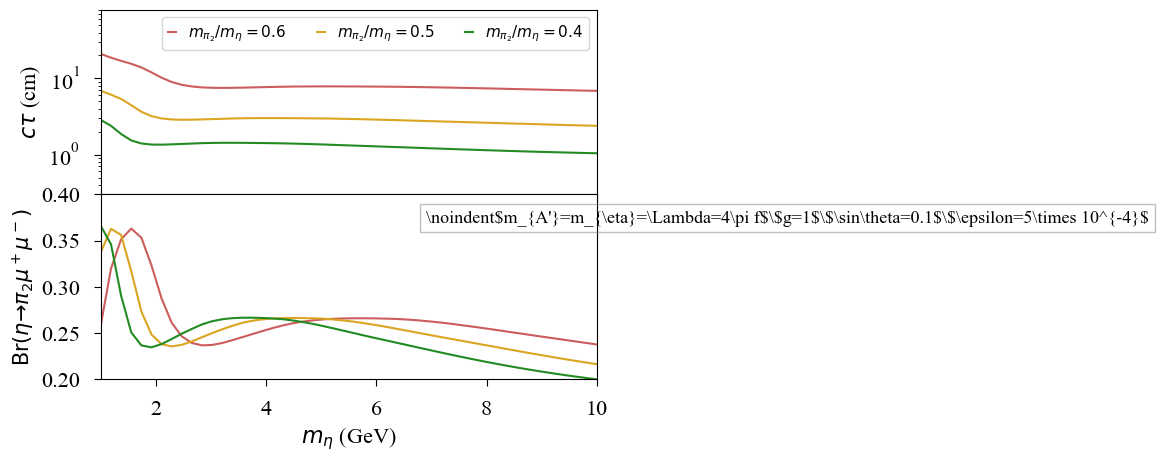

In [12]:
fig, axs = plt.subplots(2, 1,sharex=True)
axs[0].plot(mlist,ctaulist_0p6,label=r"$m_{\pi_2}/m_\eta=0.6$",color="indianred")
axs[0].plot(mlist,ctaulist_0p5,label=r"$m_{\pi_2}/m_\eta=0.5$",color="goldenrod")
axs[0].plot(mlist,ctaulist_0p4,label=r"$m_{\pi_2}/m_\eta=0.4$",color="forestgreen")
axs[0].set_yscale("log")
axs[0].set_ylim([3e-1,8e1])


axs[1].plot(mlist,brlist_0p6,label=r"$m_{\pi_2}/m_\eta=0.6$",color="indianred")
axs[1].plot(mlist,brlist_0p5,label=r"$m_{\pi_2}/m_\eta=0.5$",color="goldenrod")
axs[1].plot(mlist,brlist_0p4,label=r"$m_{\pi_2}/m_\eta=0.4$",color="forestgreen")
axs[1].set_ylim([0.2,0.4])
axs[1].set_xlim([1,10])

axs[0].legend(fontsize=11,labelspacing=0.3,ncol=3,handlelength=0.5)
axs[1].text(6.9,0.37,r"\noindent$m_{A'}=m_{\eta}=\Lambda=4\pi f$\\$g=1$\\$\sin\theta=0.1$\\$\epsilon=5\times 10^{-4}$",fontsize=13,
            horizontalalignment="left", bbox=dict(edgecolor='gray',facecolor='none', alpha=0.5))

axs[1].set_xlabel("$m_\eta$ (GeV)",fontsize=16)
axs[0].set_ylabel(r"$c\tau$ (cm)",fontsize=16)
axs[1].set_ylabel(r"$\mathrm{Br}(\eta \to \pi_2 \mu^+\mu^-)$",fontsize=15)


fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.savefig(draftdir+"eta_to_pimumu.pdf")


# Decay cards

Finally, the package can print out pythia configuration cards for the model point. The file name and path is passed as an argument to this function. Here is an example for each of the three scenarios considered in the paper.

In [13]:
scenarioA=dark_shower_two_flavor(
    m_pi2=1.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=0.5,
    g=0.1,
    epsilon=5e-4)
scenarioA.pythia_card(os.getcwd()+"/cards/test_scenarioA.cmnd")

scenarioB1=dark_shower_two_flavor(
    m_pi2=3.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=1.5,
    g=0.1,
    epsilon=5e-4)
scenarioB1.pythia_card(os.getcwd()+"/cards/test_scenarioB1.cmnd")

scenarioB2=dark_shower_two_flavor(
    m_pi2=2.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=1.5,
    g=0.1,
    epsilon=5e-4)
scenarioB2.pythia_card(os.getcwd()+"/cards/test_scenarioB2.cmnd")


scenarioC=dark_shower_two_flavor(
    m_pi2=2.2,
    m_eta=5.0,
    Lambda=4.0,
    sin_theta=0.1,
    mA=5,
    g=1,
    epsilon=5e-4)
scenarioC.pythia_card(os.getcwd()+"/cards/test_scenarioC.cmnd")